In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import path

import src.lib.utility_classfier_tuning as uclf
import src.lib.optimal_threhold_related as thres
import src.lib.fairness_tests as fair

from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import sklearn.preprocessing
from sklearn import preprocessing

In [2]:
result_path='/Users/lifuchen/Desktop/Evaluating-and-Mitigating-Bias-in-ML-Models-for-CVD/external validation/'
filename = "rf.csv"
rf = pd.read_csv(path.join(result_path, filename))

In [3]:
rf

,predict_score,true_label,GENDER,Race_B,Race_W
0,0.092314,0,0,0,1
1,0.127191,0,1,1,0
2,0.115379,0,1,0,1
3,0.110348,0,1,0,1
4,0.112240,0,1,0,1
...,...,...,...,...,...
8857,0.257139,1,0,0,1
8858,0.209566,1,1,0,1
8859,0.243183,1,1,1,0
8860,0.134244,1,0,1,0


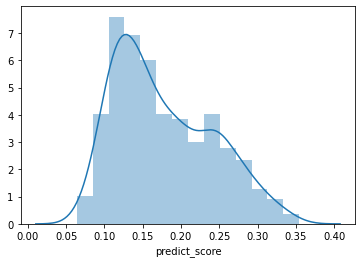

In [17]:
import seaborn as sns
sns.distplot(rf['predict_score'][rf['true_label']==1])
plt.show()

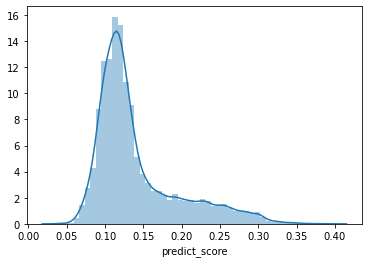

In [18]:
sns.distplot(rf['predict_score'][rf['true_label']==0])
plt.show()

In [4]:
y_test = rf['true_label']
y_score = rf['predict_score']

In [5]:
y_score_male = rf['predict_score'][rf['GENDER']==0]
y_test_male = rf['true_label'][rf['GENDER']==0]
y_score_female = rf['predict_score'][rf['GENDER']==1]
y_test_female = rf['true_label'][rf['GENDER']==1]
print(len(y_score_male), len(y_test_male), len(y_score_female), len(y_test_female))

3052 3052 5810 5810


In [11]:
y_score_white = rf['predict_score'][rf['Race_W']==1]
y_test_white = rf['true_label'][rf['Race_W']==1]
y_score_black = rf['predict_score'][rf['Race_W']==0]
y_test_black = rf['true_label'][rf['Race_W']==0]
print(len(y_score_white), len(y_score_black))

7583 1279


In [7]:
def get_result (records, y_test, y_score, y_test_1, y_score_1, y_test_2, y_score_2):    
    threshold = 0.1
    ba = thres.calculate_balanced_accuracy(y_test, y_score, threshold)
    auroc = roc_auc_score(y_test, y_score)
    precision, recall, tpr, tnr, pd_overall = thres.calculate_precision_metrics(y_test, y_score,threshold)
    
    ba_male = thres.calculate_balanced_accuracy(y_test_1, y_score_1, threshold)
    precision_male, recall_male, tpr_male, tnr_male, pd_male = thres.calculate_precision_metrics(y_test_1, y_score_1,threshold)
    
    ba_female = thres.calculate_balanced_accuracy (y_test_2, y_score_2, threshold)
    precision_female, recall_female, tpr_female, tnr_female, pd_female = thres.calculate_precision_metrics(y_test_2, y_score_2,threshold)

    eod = fair.get_EOD(y_test_1, y_score_1,threshold, y_test_2, y_score_2, threshold)
    sp = fair.get_SP(y_test_1, y_score_1,threshold, y_test_2, y_score_2, threshold)

    records.append({
        'auroc': auroc,
        'overall ba test': ba,
        'male ba test': ba_male,
        'female ba test': ba_female,
        'overall precision':precision,
        'overall recall':recall,
        'overall tpr':tpr,
        'overall tnr':tnr,
        'overall pd':pd_overall,
        'male precision':precision_male,
        'male recall':recall_male,
        'male tpr':tpr_male,
        'male tnr':tnr_male,
        'male pd':pd_male,
        'female precision':precision_female,
        'female recall':recall_female,
        'female tpr':tpr_female,
        'female tnr':tnr_female,
        'female pd':pd_female,
        'eod': eod,
        'di': sp,
        })

In [8]:
records_rf = []
get_result(records_rf, y_test, y_score, y_test_male, y_score_male, y_test_female, y_score_female)

True positive rate of class 1 is  0.945
True positive rate of class 2 is  0.918
Positive prediction rate of class 1 is  0.853
Positive prediction rate of class 2 is  0.817


In [9]:
records_rf

[{'auroc': 0.6858008248573554,
  'overall ba test': 0.5546751736541801,
  'male ba test': 0.551743119266055,
  'female ba test': 0.5547078296990058,
  'overall precision': 0.5314645308924485,
  'overall recall': 0.929,
  'overall tpr': 0.929,
  'overall tnr': 0.181,
  'overall pd': 0.829,
  'male precision': 0.5291153415453527,
  'male recall': 0.945,
  'male tpr': 0.945,
  'male tnr': 0.159,
  'male pd': 0.853,
  'female precision': 0.5318655851680185,
  'female recall': 0.918,
  'female tpr': 0.918,
  'female tnr': 0.192,
  'female pd': 0.817,
  'eod': 0.026999999999999913,
  'di': 1.04406364749082}]

In [12]:
records_rf_race = []
get_result(records_rf_race, y_test, y_score, y_test_white, y_score_white, y_test_black, y_score_black)
records_rf_race

True positive rate of class 1 is  0.952
True positive rate of class 2 is  0.858
Positive prediction rate of class 1 is  0.848
Positive prediction rate of class 2 is  0.72


[{'auroc': 0.6858008248573554,
  'overall ba test': 0.5546751736541801,
  'male ba test': 0.5566125912937699,
  'female ba test': 0.5814293890801956,
  'overall precision': 0.5314645308924485,
  'overall recall': 0.929,
  'overall tpr': 0.929,
  'overall tnr': 0.181,
  'overall pd': 0.829,
  'male precision': 0.5315466219988833,
  'male recall': 0.952,
  'male tpr': 0.952,
  'male tnr': 0.161,
  'male pd': 0.848,
  'female precision': 0.5524790727623954,
  'female recall': 0.858,
  'female tpr': 0.858,
  'female tnr': 0.305,
  'female pd': 0.72,
  'eod': 0.09399999999999997,
  'di': 1.1777777777777778}]